# CARREGAR DADOS

In [4]:
import pandas as pd
df = pd.read_csv(r'../dados/probing.csv')

In [5]:
df.shape

(3234, 14)

# Analisar Dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234 entries, 0 to 3233
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indice       3234 non-null   int64  
 1   Mes          3234 non-null   int64  
 2   Dia          3234 non-null   int64  
 3   Dia Semana   3234 non-null   int64  
 4   Hora         3234 non-null   int64  
 5   Minuto       3234 non-null   int64  
 6   Clima        3234 non-null   object 
 7   Temperatura  3234 non-null   float64
 8   IsDay        3234 non-null   int64  
 9   Sopa         689 non-null    object 
 10  Prato        689 non-null    object 
 11  IsMeat       689 non-null    float64
 12  isFeriado    3234 non-null   int64  
 13  Probes       3234 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 353.8+ KB


In [7]:
df.describe()

,Indice,Mes,Dia,Dia Semana,Hora,Minuto,Temperatura,IsDay,IsMeat,isFeriado,Probes
count,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,689.000000,3234.000000,3234.000000
mean,1616.500000,4.247681,19.067409,2.878788,11.596784,29.537724,12.941033,0.277056,0.657475,0.345393,24.196970
std,933.719712,0.431732,10.036360,1.996632,6.900293,17.360677,4.398911,0.447614,0.474899,0.475570,60.739615
min,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,4.320000,0.000000,0.000000,0.000000,0.000000
25%,808.250000,4.000000,19.000000,1.000000,6.000000,14.000000,9.960000,0.000000,0.000000,0.000000,6.000000
50%,1616.500000,4.000000,23.000000,3.000000,12.000000,29.000000,12.260000,0.000000,1.000000,0.000000,7.000000
75%,2424.750000,4.000000,26.000000,5.000000,17.000000,45.000000,15.360000,1.000000,1.000000,1.000000,12.000000
max,3233.000000,5.000000,30.000000,6.000000,23.000000,59.000000,25.960000,1.000000,1.000000,1.000000,450.000000


# Tratamento de dados

In [8]:
df['Clima']=df['Clima'].astype('category').cat.codes
df['Sopa']=df['Sopa'].astype('category').cat.codes
df['Prato']=df['Prato'].astype('category').cat.codes

df['IsMeat'] = df['IsMeat'].fillna(-1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234 entries, 0 to 3233
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Indice       3234 non-null   int64  
 1   Mes          3234 non-null   int64  
 2   Dia          3234 non-null   int64  
 3   Dia Semana   3234 non-null   int64  
 4   Hora         3234 non-null   int64  
 5   Minuto       3234 non-null   int64  
 6   Clima        3234 non-null   int8   
 7   Temperatura  3234 non-null   float64
 8   IsDay        3234 non-null   int64  
 9   Sopa         3234 non-null   int8   
 10  Prato        3234 non-null   int8   
 11  IsMeat       3234 non-null   float64
 12  isFeriado    3234 non-null   int64  
 13  Probes       3234 non-null   int64  
dtypes: float64(2), int64(9), int8(3)
memory usage: 287.5 KB


In [10]:
df.isna().sum()

Indice         0
Mes            0
Dia            0
Dia Semana     0
Hora           0
Minuto         0
Clima          0
Temperatura    0
IsDay          0
Sopa           0
Prato          0
IsMeat         0
isFeriado      0
Probes         0
dtype: int64

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df.drop(['Indice','Probes'], axis=1)
y = df['Probes']

X_train, X_test, y_train, y_test  = train_test_split(X,y , test_size=0.2, random_state=25)

scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


# Criar o modelo

In [12]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense,Activation, Input
from livelossplot.inputs.tf_keras import PlotLossesCallback

model = Sequential()
model.add(Flatten(input_shape=(12,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 2,106,881
Trainable params: 2,106,881
Non-trainable params: 0
______________________________________________

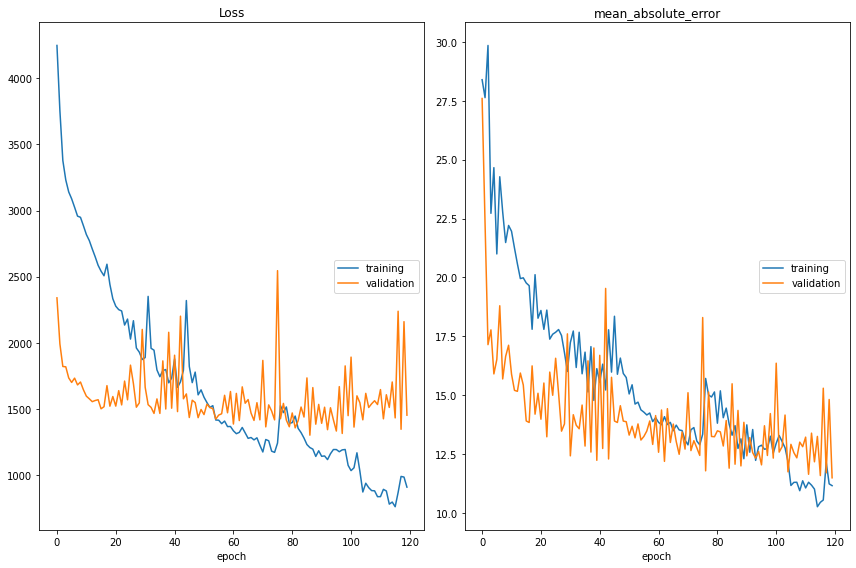

Loss
	training         	 (min:  760.178, max: 4248.541, cur:  908.319)
	validation       	 (min: 1301.339, max: 2545.577, cur: 1452.496)
mean_absolute_error
	training         	 (min:   10.268, max:   29.844, cur:   11.163)
	validation       	 (min:   11.496, max:   27.593, cur:   11.496)


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_error')



history = model.fit(X_train, y_train, epochs=120, batch_size=1024, validation_data=(X_test,y_test), callbacks=[PlotLossesCallback()])

# Guardar o modelo

In [15]:
model.save('../dados/modelo')

INFO:tensorflow:Assets written to: ../dados/modelo\assets


In [16]:
from tensorflow.keras.models import load_model

new_model = load_model('../dados/modelo')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 2,106,881
Trainable params: 2,106,881
Non-trainable params: 0
______________________________________________

In [13]:
print(new_model.predict(X_test).shape)

(647, 1)


In [14]:
print(new_model.predict(df.drop(['Indice','Probes'],axis=1)))





[[111.971085]
 [101.14739 ]
 [143.17307 ]
 ...
 [107.51179 ]
 [ 14.829517]
 [  7.601173]]
